<h1> Clustering </h1>

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

In [3]:
np.random.seed(0)

In [4]:
X, y = make_blobs(n_samples=5000, centers=[[4,4],[-2,-1],[-2,-3],[1,1]], cluster_std=0.9)

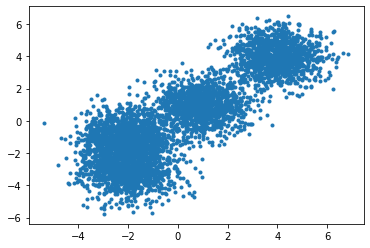

In [5]:
plt.scatter(X[:,0],X[:,1],marker=".")

In [6]:
k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)

In [7]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
k_means_labels = k_means.labels_
k_means_labels

array([3, 0, 0, ..., 1, 3, 3])

In [9]:
k_means_cluster_centres = k_means.cluster_centers_
k_means_cluster_centres

array([[-1.98376364, -3.13376268],
       [ 3.97334234,  3.98758687],
       [ 0.96764319,  0.97177785],
       [-2.04586093, -0.88557949]])

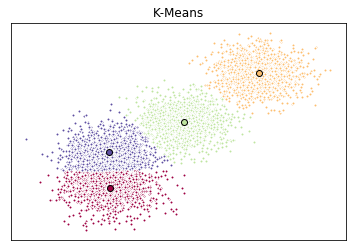

In [10]:
fig = plt.figure(figsize=[6,4])

colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

ax = fig.add_subplot(1, 1, 1)

for k,col in zip(range(len(k_means_cluster_centres)),colors):
    my_members = (k_means_labels == k)
    
    cluster_centre = k_means_cluster_centres[k]
    ax.plot(X[my_members,0], X[my_members, 1], 'w',
           markerfacecolor=col, marker='.')
    ax.plot(cluster_centre[0], cluster_centre[1], 'o',
           markerfacecolor=col, markeredgecolor='k', markersize=6)
    
ax.set_title('K-Means')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

In [11]:
import pandas as pd
cost_df = pd.read_csv("Cust_Segmentation.csv")
cost_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [12]:
df = cost_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [13]:
from sklearn.preprocessing import StandardScaler
import numpy as np
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataset = StandardScaler().fit_transform(X)
Clus_dataset

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [14]:
from sklearn.cluster import KMeans

clusterNum = 3
k_means = KMeans(init = 'k-means++', n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 2 1 1 0 2 1 2 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 1 1 2 1 2 1 1 1 1 1 1
 1 1 2 1 2 1 0 1 2 1 1 1 2 2 1 1 2 2 1 1 1 2 1 2 1 2 2 1 1 2 1 1 1 2 2 2 1
 1 1 1 1 2 1 2 2 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 2 1 2 2 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 1
 1 1 1 1 2 1 1 2 1 2 1 1 2 0 1 2 1 1 1 1 1 1 0 2 1 1 1 1 2 1 1 2 2 1 2 1 2
 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 0 2 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 2 1 2 2 1 1 1 1 1 1
 1 1 1 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 2 1 2 2 1
 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 0 1 1 1 2 1 2 2 2 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 2 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 0
 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 2 1 0 1 1 1 1 2 1 2 2 2 1 1 2 2 1 1 1 1 1 1
 1 2 1 1 1 1 2 1 1 1 2 1 

In [16]:
#penambahan kolom

df['Clus_km'] = labels
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


In [17]:
#mencari rata-rata 

df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
1,432.006154,32.967692,1.613846,6.389231,31.204615,1.032711,2.108345,0.284658,10.095385
2,403.780220,41.368132,1.961538,15.252747,84.076923,3.114412,5.770352,0.172414,10.725824


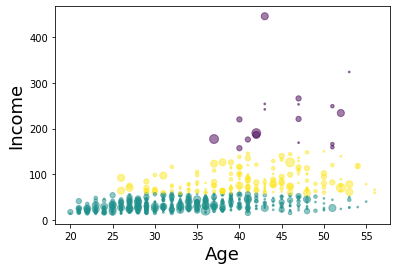

In [20]:
import matplotlib.pyplot as plt

area = np.pi * (X[:,1]**2)
plt.scatter(X[:,0], X[:,3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age',fontsize=18)
plt.ylabel('Income', fontsize=18)

plt.show()

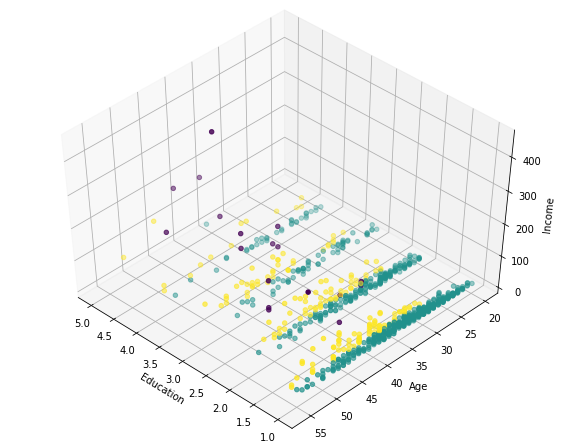

In [21]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8,6))
plt.clf()
ax = Axes3D(fig, rect=[0,0,.95,1], elev=48, azim=134)

plt.cla()

ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:,1],X[:,0],X[:,3],c=labels.astype(np.float))

<h1> Classification </h1>

In [22]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [23]:
df = pd.read_csv("teleCust1000t.csv")

In [24]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [25]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000259F9B137F0>]],
      dtype=object)

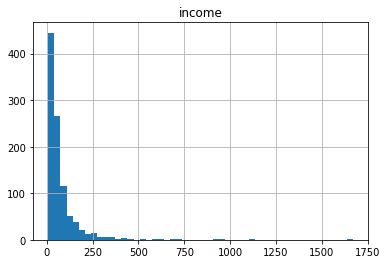

In [26]:
df.hist(column='income',bins=50)

In [27]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [28]:
X = df [['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
        'employ', 'retire', 'gender', 'reside']].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [29]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [30]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=4)
print("Train set", X_train.shape, y_train.shape)
print("Test set", X_test.shape, y_test.shape)

Train set (800, 11) (800,)
Test set (200, 11) (200,)


In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
k = 4

neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [38]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

In [39]:
from sklearn import metrics
print("Train set Accuracy : ", metrics.accuracy_score(
    y_train, neigh.predict(X_train)))
print("Test set Accuracy : ", metrics.accuracy_score(y_test,yhat))

Train set Accuracy :  0.5475
Test set Accuracy :  0.32
